In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [36]:
import pandas as pd
import os
from pathlib import Path

def load_all_csvs_with_filename_column(directory):
    """
    Betölti a megadott könyvtár összes .csv fájlját egy közös DataFrame-be,
    és hozzáadja a fájlnevet egy 'filename' oszlopban.

    Args:
        directory (str or Path): A könyvtár elérési útja.

    Returns:
        pd.DataFrame: Az egyesített adatkeret.
    """
    all_dfs = []
    directory = Path(directory)

    for csv_file in directory.glob("*.csv"):
        df = pd.read_csv(csv_file)
        df['filename'] = csv_file.name
        all_dfs.append(df)

    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
    else:
        combined_df = pd.DataFrame()

    return combined_df

# Példa használat
# Cseréld ki e
results = load_all_csvs_with_filename_column('res')
results

,Unnamed: 0,qid,question,derivation,pred,pred_scale,answer,scale,abs,inv,good,parenth,em,filename
0,0,b2786c1a-37de-4120-b03c-32bf5c81f157,What was the change in the amount for Applianc...,680-774,-94.0,million,-94.00,million,False,False,True,False,True,Ollama_20_gwen3_4b_code_values_v11_m1.csv
1,1,fe11f001-3bfe-4089-8108-412676f0a780,What was the percentage change in the amount f...,(680-774)/774,-12.14,percent,-12.14,percent,False,False,True,False,True,Ollama_20_gwen3_4b_code_values_v11_m1.csv
2,2,5103aed0-b4e8-4fae-bf78-e2c9f4ba84cf,What is the difference between the domestic an...,4.00 - 1.90,2.1,percent,2.10,percent,False,False,True,False,True,Ollama_20_gwen3_4b_code_values_v11_m1.csv
3,3,4dc8be43-d8d9-4b08-9ffd-9c19012361ce,What is the year on year percentage change in ...,(4.00 - 3.75)/3.75,6.67,percent,6.67,percent,False,False,True,False,True,Ollama_20_gwen3_4b_code_values_v11_m1.csv
4,4,6c44a1a8-0785-43a0-90ab-7e21df2c57d9,What is the year on year percentage change in ...,(3.40 - 3.70)/3.70,-8.11,percent,-8.11,percent,False,False,True,False,True,Ollama_20_gwen3_4b_code_values_v11_m1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,492,c8ed0bf6-60c5-41e2-97e3-5ece54a1349b,What is the change in total personnel expenses...,"227,727 - 188,503",227727.0,NaN,39224.00,NaN,False,NaN,False,False,False,Ollama_26_gwen3_4b_nothink_naive_p1.csv
8746,493,4cdc8b2e-e3ea-4c36-bbda-7c409a84cc78,What is the percentage change in total personn...,"(227,727 - 188,503 )/188,503",2.22,percent,20.81,percent,False,NaN,False,False,False,Ollama_26_gwen3_4b_nothink_naive_p1.csv
8747,494,ec696158-f93d-4608-903d-a6b9c4e7bfd5,What is the increase / (decrease) in the telec...,86.8 - 87.0,-0.23,million,-0.20,million,False,NaN,False,False,False,Ollama_26_gwen3_4b_nothink_naive_p1.csv
8748,495,27911d6f-dfe5-487b-bc56-7e5cf16a32e0,What is the average telecommunications install...,(33.2 + 41.5) / 2,33.2,thousand,37.35,million,False,NaN,False,False,False,Ollama_26_gwen3_4b_nothink_naive_p1.csv


In [13]:
import re

def replace_numbers(texts, replacement="#"):
    """
    Lecseréli a számokat a megadott helyettesítő karakterláncra.

    Args:
        texts (list of str): Kifejezések listája.
        replacement (str): A csereérték (pl. "#" vagy "NUM").

    Returns:
        list of str: A módosított kifejezések listája.
    """
    number_pattern = r"\d+(?:[\.,]\d+)?"
    return [re.sub(number_pattern, replacement, text).replace(" ","").strip() for text in texts]



In [26]:

#devdf = pd.read_json('dataset_raw/tatqa_dataset_dev.json')
res = pd.read_csv('res/Ollama_24_gwen3_4b_nothinking_code_values_v11_m1.csv')

derivates = list(res['derivation'])
derivates = replace_numbers(derivates)
derivates[1:10]

['(#-#)/#',
 '#-#',
 '(#-#)/#',
 '(#-#)/#',
 '(#+#)/#',
 '(#+#)/#',
 '[(#+#)/#]-[(#+#)/#]',
 '(#-#)/#',
 '(#-#)/#']

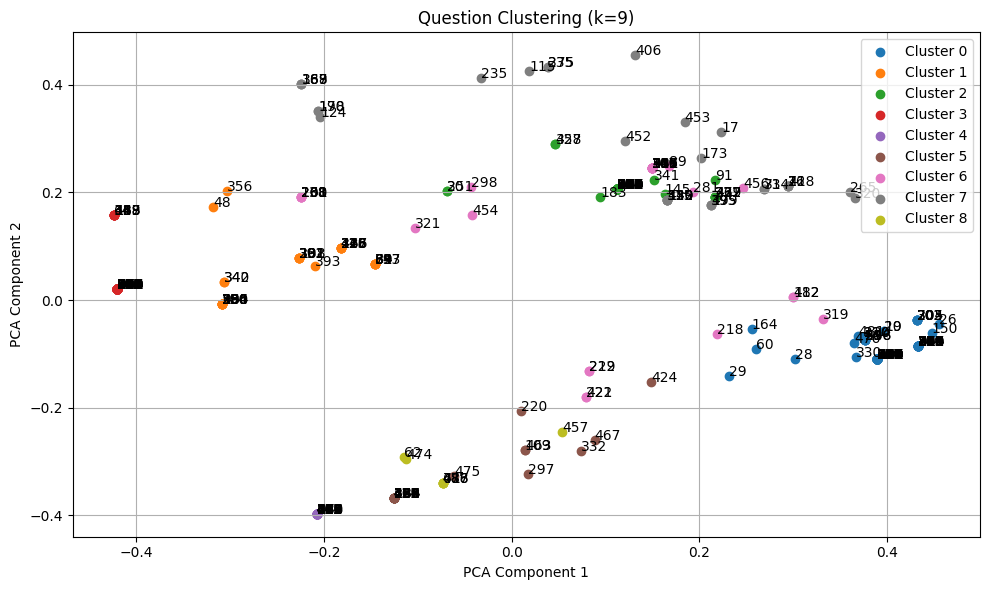

In [27]:
# 2. Modell betöltése
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# 3. Embeddingek generálása
embeddings = model.encode(derivates)

# 4. Optimális klaszterszám keresése (Silhouette score alapján)
silhouette_scores = []
range_n_clusters = range(3, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Legjobb klaszterszám kiválasztása
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# 5. KMeans újrafuttatása optimális klaszterszámmal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

# 6. Adatok DataFrame-be
df = pd.DataFrame({
    'derivates': derivates,
    'cluster': labels
})

# 7. Embeddingek 2D-re csökkentése PCA-val vizualizációhoz
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 8. Vizualizáció
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_clusters):
    cluster_points = reduced_embeddings[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")
for i, question in enumerate(derivates):
    plt.annotate(f"{i}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title(f"Question Clustering (k={optimal_clusters})")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



In [29]:
em_points = reduced_embeddings[res['em'] == True]
failed_points = reduced_embeddings[res['em'] == False]

In [34]:
plt.scatter(em_points[:, 0], em_points[:, 1], label=f"EM")
plt.scatter(failed_points[:, 0], failed_points[:, 1], label=f"Failed")
for cluster_id in range(optimal_clusters):
    cluster_points = reduced_embeddings[labels == cluster_id]
#    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")    
    plt.annotate(f"{cluster_id}", (cluster_points[:, 0], cluster_points[:, 1]))

plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

Error in callback <function _draw_all_if_interactive at 0x7fbe8fdec700> (for post_execute):


TypeError: only size-1 arrays can be converted to Python scalars

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>